In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection, preprocessing, metrics
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('digital_marketing_campaign_dataset.csv')
data

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


In [3]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')

In [4]:
data["CampaignChannel"].unique()

array(['Social Media', 'Email', 'PPC', 'Referral', 'SEO'], dtype=object)

<Axes: title={'center': 'Conversion Rate by Campaign Channel'}, ylabel='CampaignChannel'>

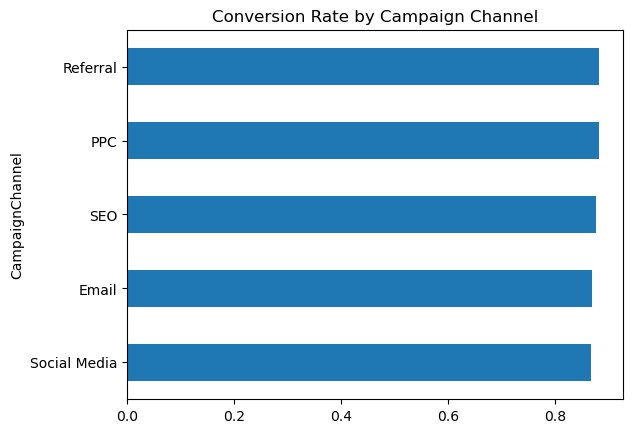

In [5]:
# Example: Conversion rate by CampaignChannel
data.groupby('CampaignChannel')['Conversion'].mean().sort_values().plot(kind='barh', title='Conversion Rate by Campaign Channel')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

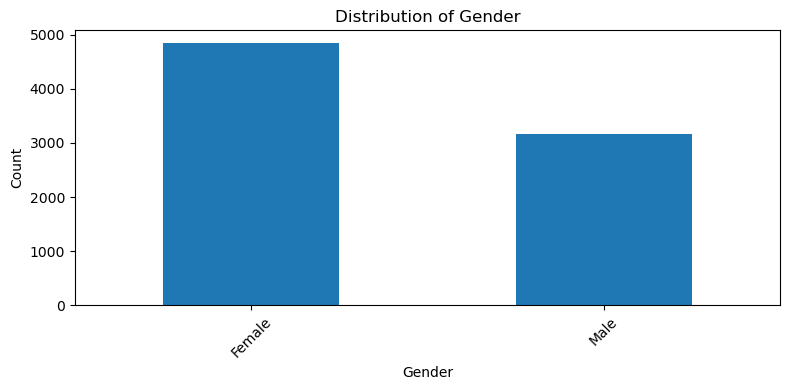

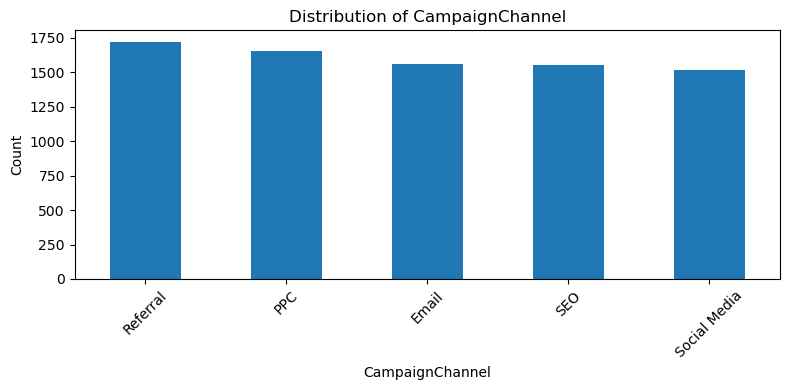

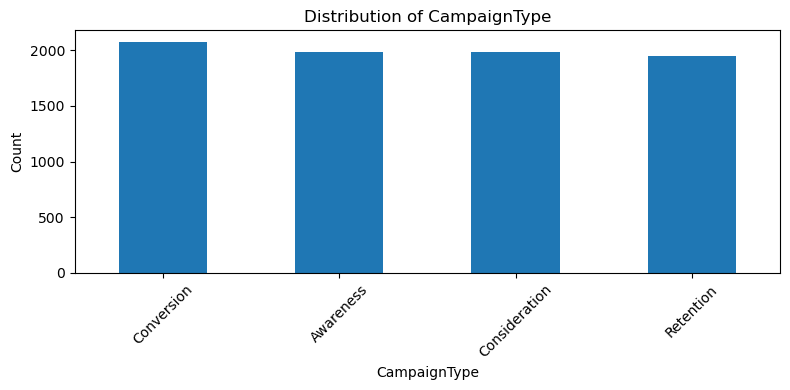

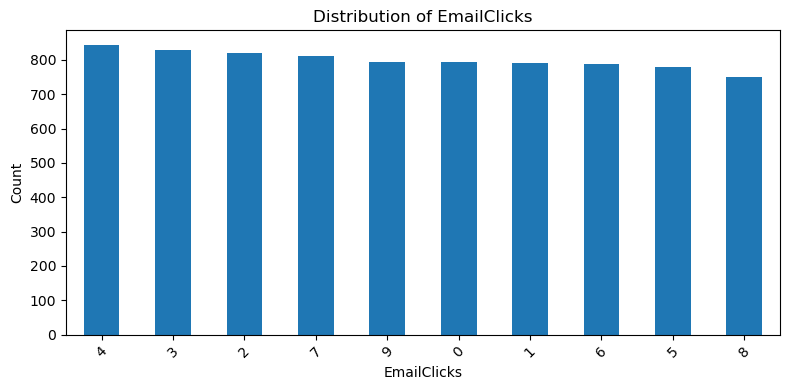

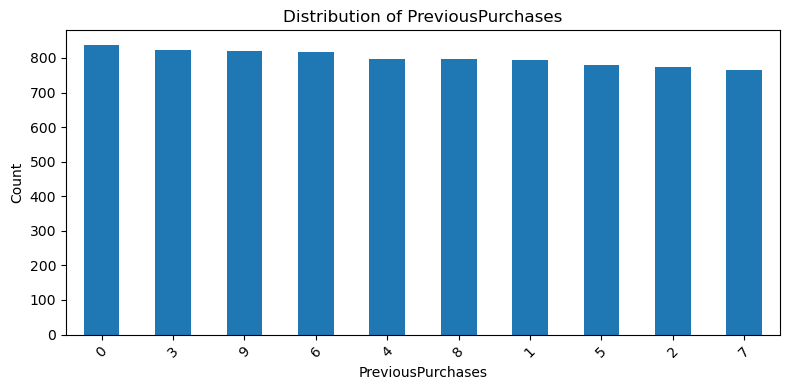

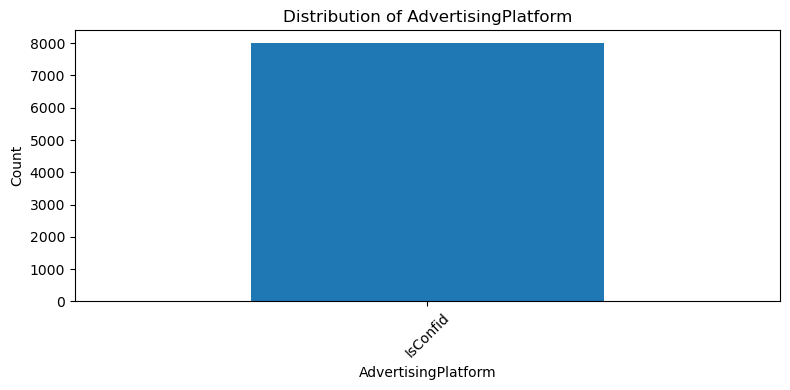

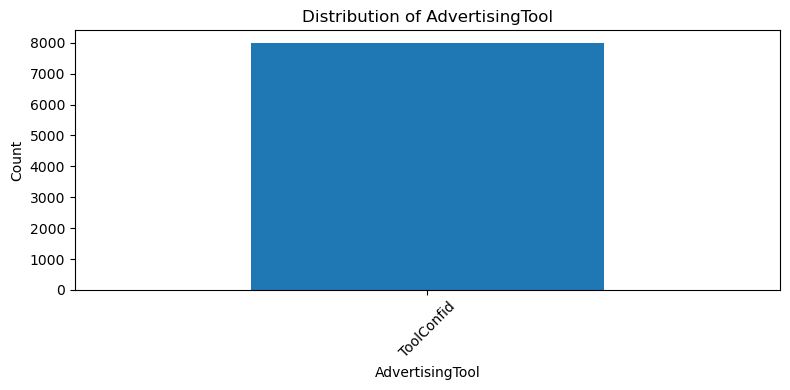

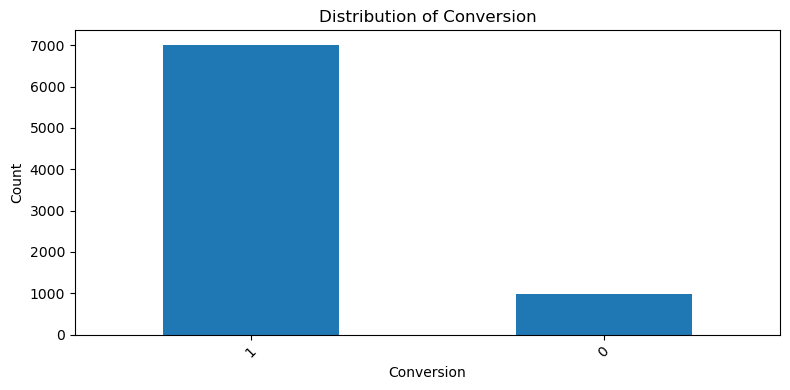

In [7]:
import matplotlib.pyplot as plt

# Loop through each column in the DataFrame
for col in data.columns:
    if data[col].dtype == 'object' or data[col].nunique() < 20:  # categorical or low cardinality
        plt.figure(figsize=(8, 4))
        data[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


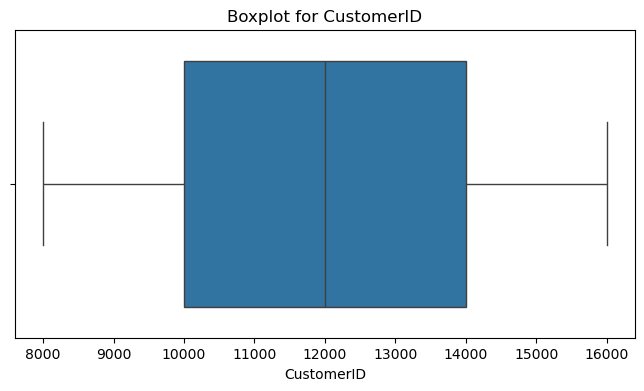

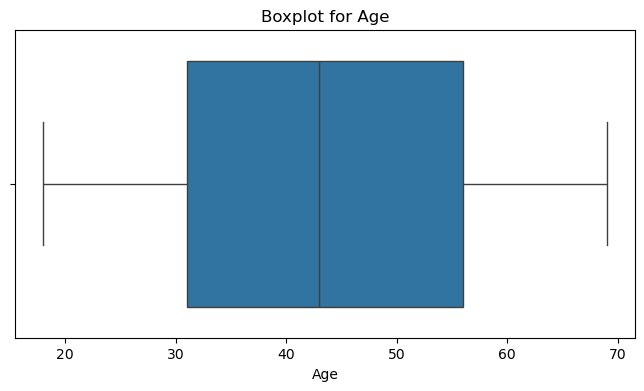

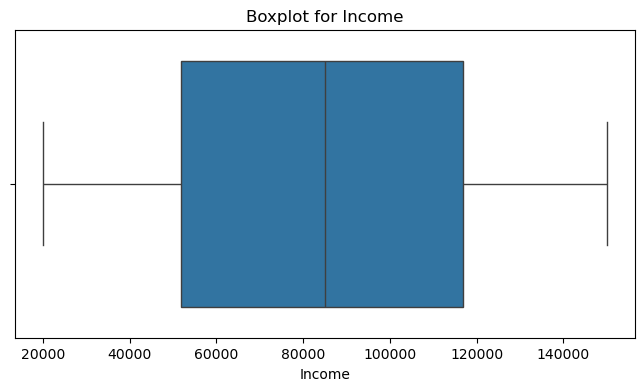

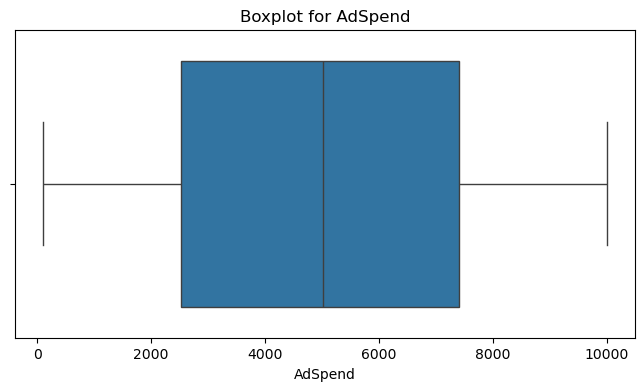

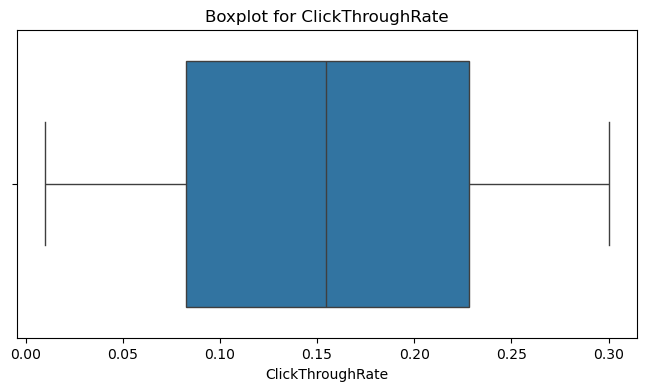

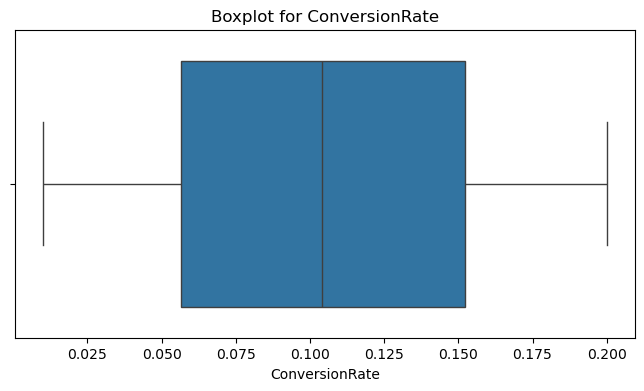

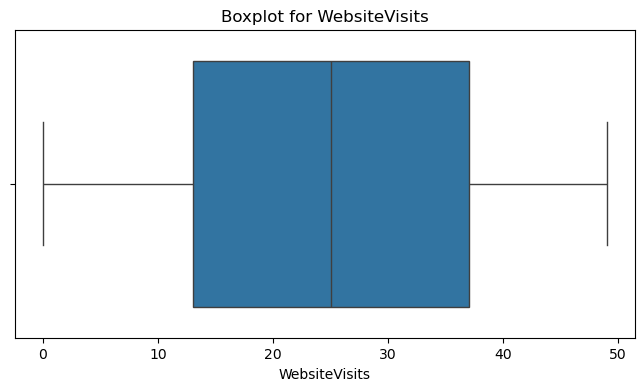

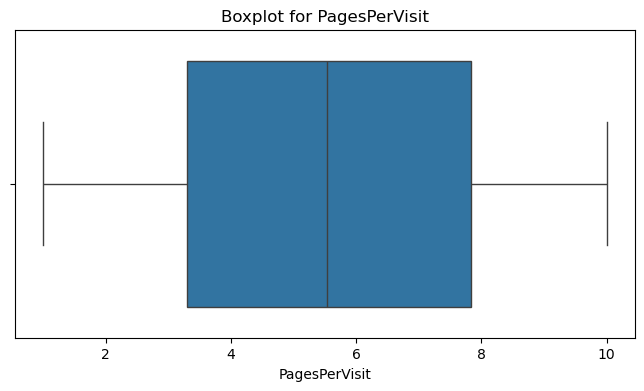

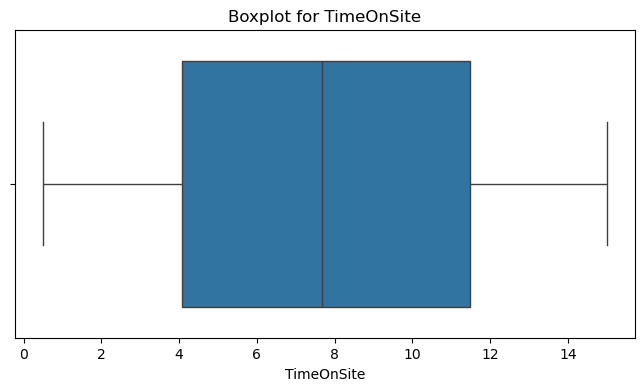

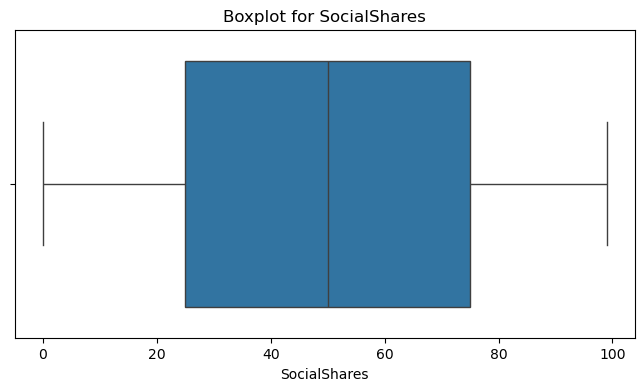

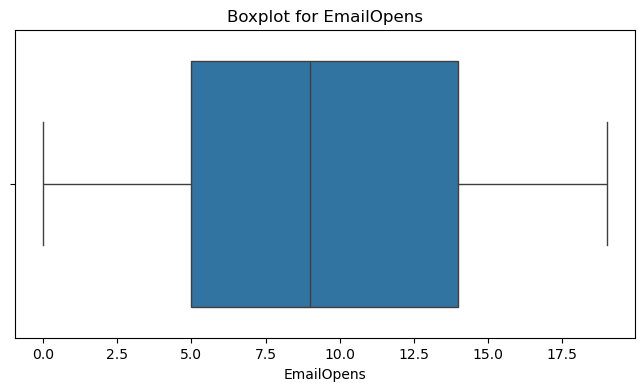

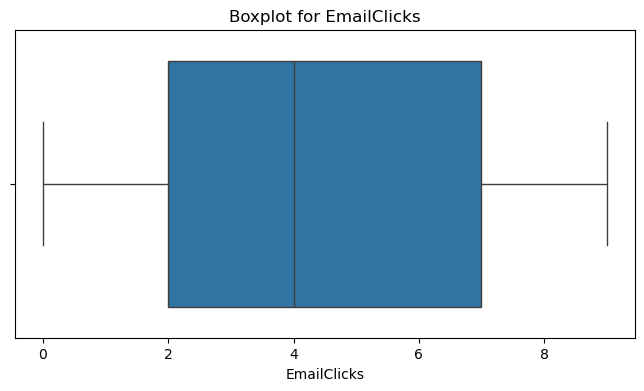

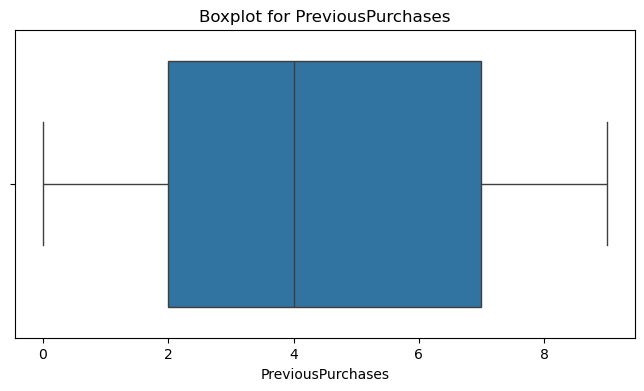

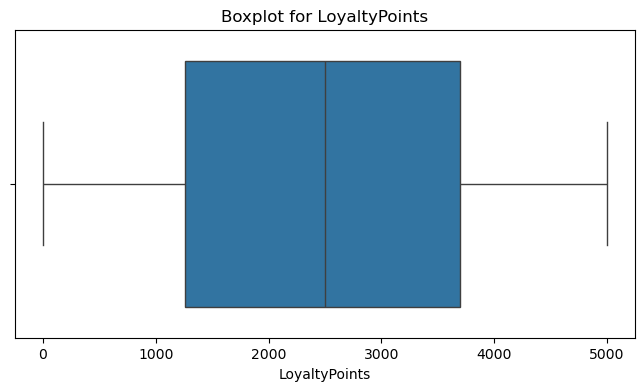

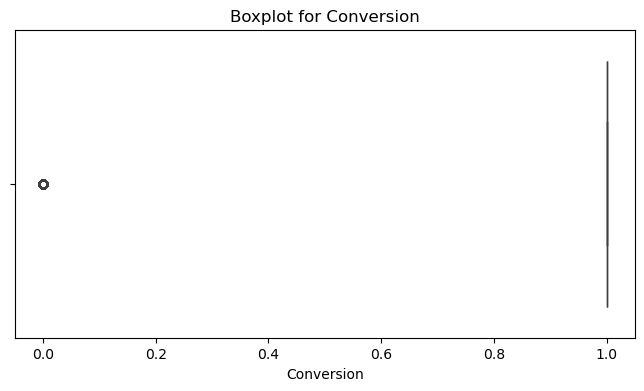

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each numerical column and plot a boxplot
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()


In [15]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

df = pd.get_dummies(data, columns=['CampaignType', 'CampaignChannel'], dtype=int)

df = df.drop(['AdvertisingPlatform'] , axis=1)
df = df.drop(['AdvertisingTool'] , axis=1)
df = df.drop(['CustomerID'] , axis=1)

df

,Age,Gender,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,...,Conversion,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media
0,56,0,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,...,1,1,0,0,0,0,0,0,0,1
1,69,1,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,...,1,0,0,0,1,1,0,0,0,0
2,46,0,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,...,1,1,0,0,0,0,1,0,0,0
3,32,0,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,...,1,0,0,1,0,0,1,0,0,0
4,60,0,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,21,1,24849,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,...,0,1,0,0,0,1,0,0,0,0
7996,43,0,44718,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,...,0,0,0,0,1,0,0,0,1,0
7997,28,0,125471,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,...,1,0,1,0,0,0,0,1,0,0
7998,19,0,107862,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,...,1,0,1,0,0,0,1,0,0,0


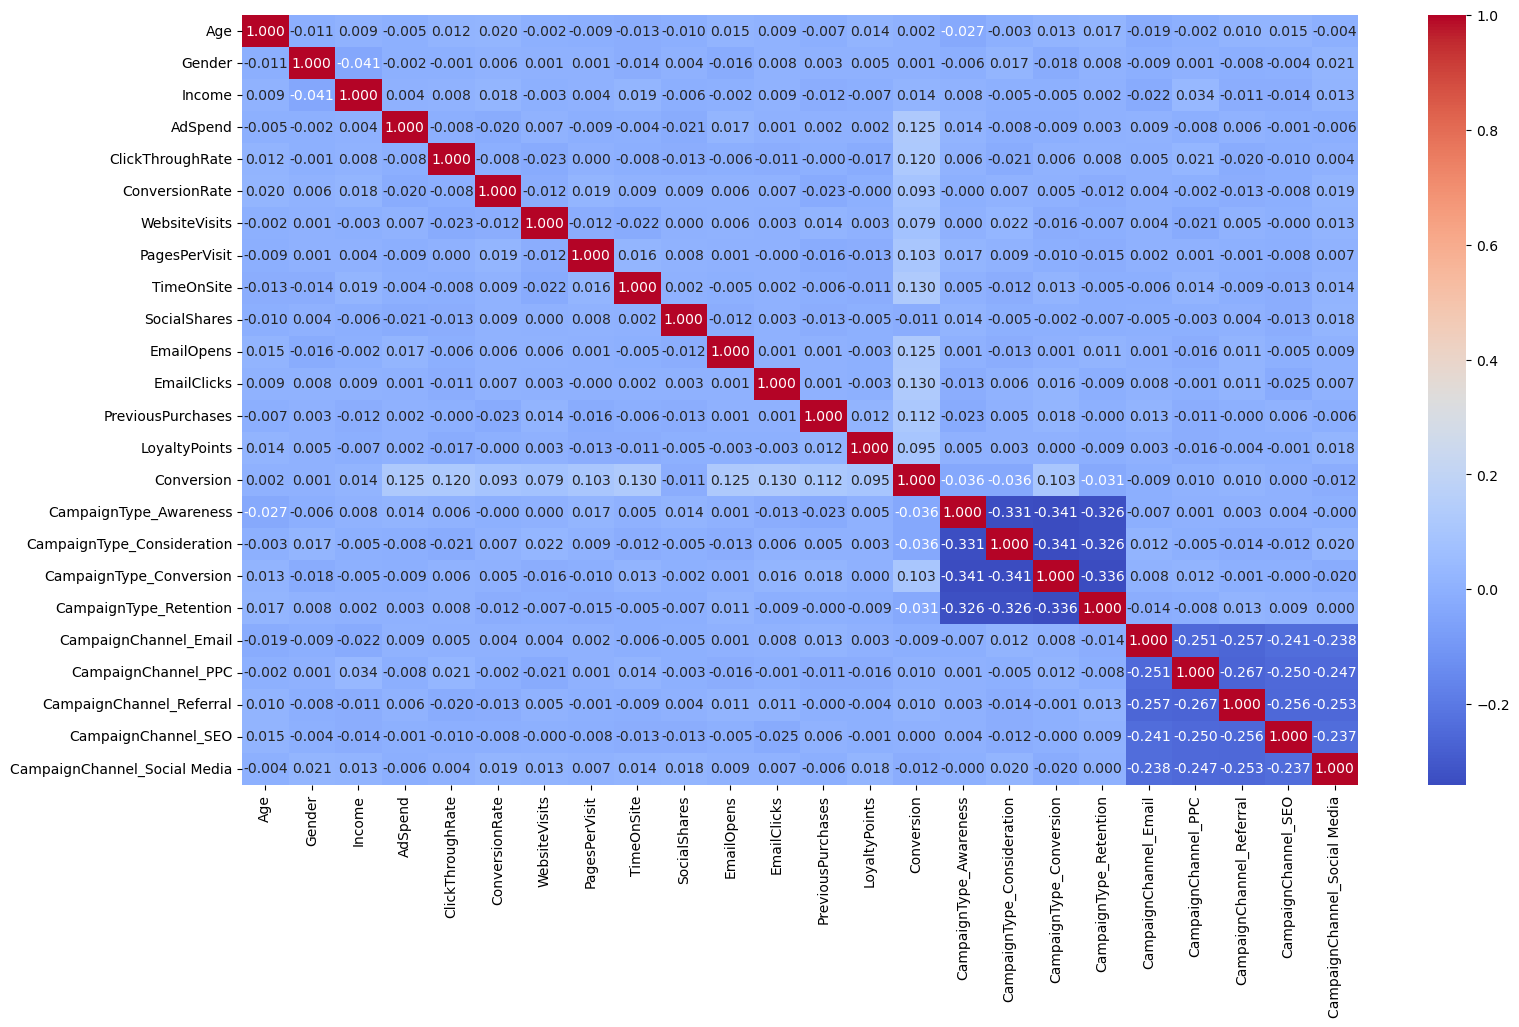

In [17]:
correlation_matrix = df.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm', cbar=True)
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           8000 non-null   int64  
 1   Gender                        8000 non-null   int32  
 2   Income                        8000 non-null   int64  
 3   AdSpend                       8000 non-null   float64
 4   ClickThroughRate              8000 non-null   float64
 5   ConversionRate                8000 non-null   float64
 6   WebsiteVisits                 8000 non-null   int64  
 7   PagesPerVisit                 8000 non-null   float64
 8   TimeOnSite                    8000 non-null   float64
 9   SocialShares                  8000 non-null   int64  
 10  EmailOpens                    8000 non-null   int64  
 11  EmailClicks                   8000 non-null   int64  
 12  PreviousPurchases             8000 non-null   int64  
 13  Loy

Before SMOTE:
 Conversion
1    5610
0     790
Name: count, dtype: int64
After SMOTE:
 Conversion
1    5610
0    5610
Name: count, dtype: int64


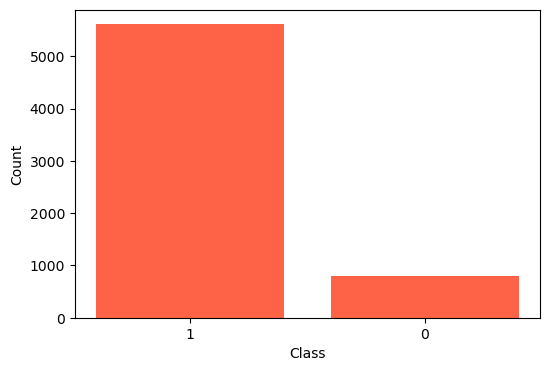

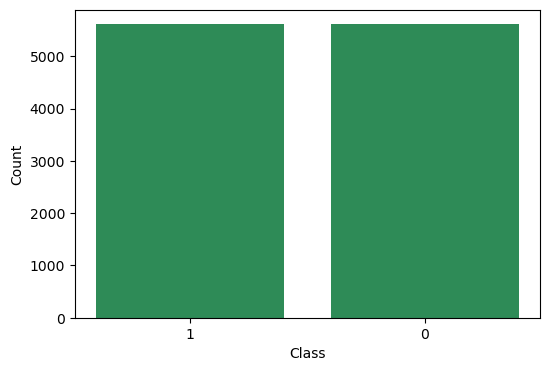

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Features and target
X_features = df.drop('Conversion', axis=1)
y_target = df['Conversion']

# Train-test split
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_features, y_target, test_size=0.2, random_state=42, stratify=y_target
)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_orig, y_train_orig)

# Confirm balanced classes
print("Before SMOTE:\n", y_train_orig.value_counts())
print("After SMOTE:\n", y_train_smote.value_counts())

import matplotlib.pyplot as plt

# Count values before and after SMOTE
before_counts = y_train_orig.value_counts()
after_counts = y_train_smote.value_counts()

# Plot: Before SMOTE
plt.figure(figsize=(6, 4))
plt.bar(before_counts.index.astype(str), before_counts.values, color='tomato')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(False)
plt.show()

# Plot: After SMOTE
plt.figure(figsize=(6, 4))
plt.bar(after_counts.index.astype(str), after_counts.values, color='seagreen')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(False)
plt.show()


Accuracy: 0.796
Confusion Matrix:
[[  65  133]
 [ 193 1209]]
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.33      0.29       198
           1       0.90      0.86      0.88      1402

    accuracy                           0.80      1600
   macro avg       0.58      0.60      0.58      1600
weighted avg       0.82      0.80      0.81      1600



F:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 800x600 with 0 Axes>

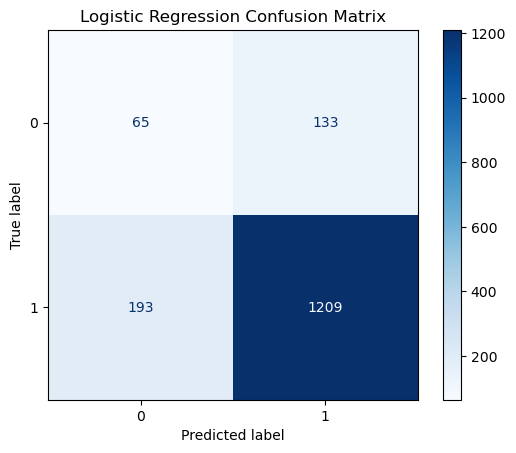

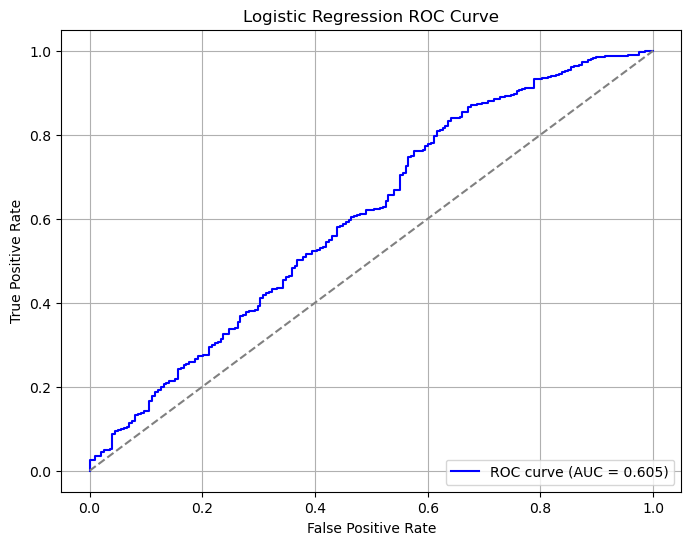

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train on SMOTE-balanced training set
model = LogisticRegression(max_iter=5000)
model.fit(X_train_smote, y_train_smote)

# Predict on original (imbalanced) test set
y_pred = model.predict(X_test_orig)

# Evaluate the model
accuracy = accuracy_score(y_test_orig, y_pred)
conf_matrix = confusion_matrix(y_test_orig, y_pred)
class_report = classification_report(y_test_orig, y_pred)

# Print metrics
print(f'Accuracy: {accuracy:.3f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_).plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


from sklearn.metrics import roc_curve, roc_auc_score

# Step 1: Predict probabilities for the positive class (usually class 1)
y_probs = model.predict_proba(X_test_orig)[:, 1]  # Probability estimates for class 1

# Step 2: Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test_orig, y_probs)
roc_auc = roc_auc_score(y_test_orig, y_probs)

# Step 3: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


🔹 Decision Tree (SMOTE-trained, Original Test Set):
Accuracy: 0.797
Confusion Matrix:
[[  72  126]
 [ 198 1204]]
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.36      0.31       198
           1       0.91      0.86      0.88      1402

    accuracy                           0.80      1600
   macro avg       0.59      0.61      0.59      1600
weighted avg       0.83      0.80      0.81      1600



<Figure size 800x600 with 0 Axes>

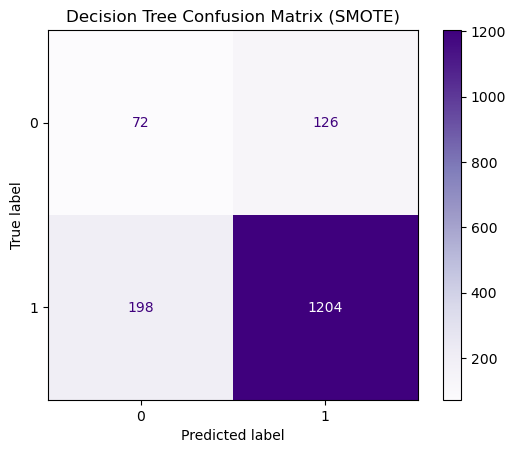

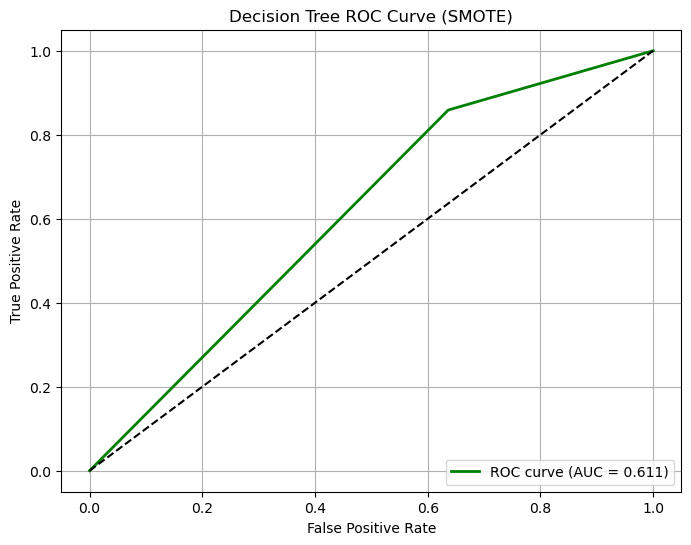

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Train Decision Tree on SMOTE data
dt_model_smote = DecisionTreeClassifier(random_state=42)
dt_model_smote.fit(X_train_smote, y_train_smote)

# Step 2: Predict on original test set
y_pred_dt_smote = dt_model_smote.predict(X_test_orig)

# Step 3: Evaluate performance
print("🔹 Decision Tree (SMOTE-trained, Original Test Set):")
print(f"Accuracy: {accuracy_score(y_test_orig, y_pred_dt_smote):.3f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_orig, y_pred_dt_smote))
print("Classification Report:")
print(classification_report(y_test_orig, y_pred_dt_smote))

# Step 4: Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_orig, y_pred_dt_smote),
                       display_labels=dt_model_smote.classes_).plot(cmap='Purples')
plt.title('Decision Tree Confusion Matrix (SMOTE)')
plt.show()


from sklearn.metrics import roc_curve, roc_auc_score

# Step 5: Predict probabilities for positive class
y_probs_dt = dt_model_smote.predict_proba(X_test_orig)[:, 1]

# Step 6: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_orig, y_probs_dt)
roc_auc = roc_auc_score(y_test_orig, y_probs_dt)

# Step 7: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve (SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


🔹 Decision Tree (max_depth=4, SMOTE-trained, Original Test Set):
Accuracy: 0.871
Confusion Matrix:
[[  13  185]
 [  22 1380]]
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.07      0.11       198
           1       0.88      0.98      0.93      1402

    accuracy                           0.87      1600
   macro avg       0.63      0.52      0.52      1600
weighted avg       0.82      0.87      0.83      1600



<Figure size 800x600 with 0 Axes>

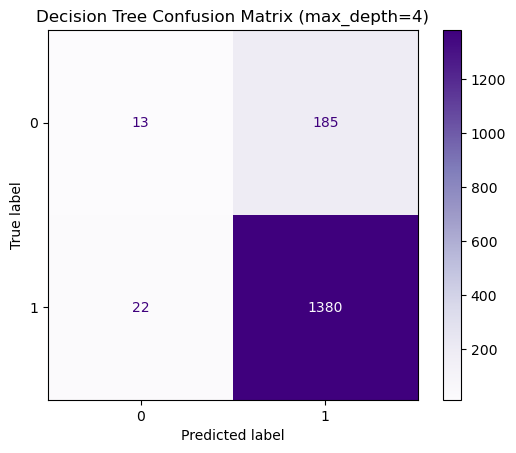

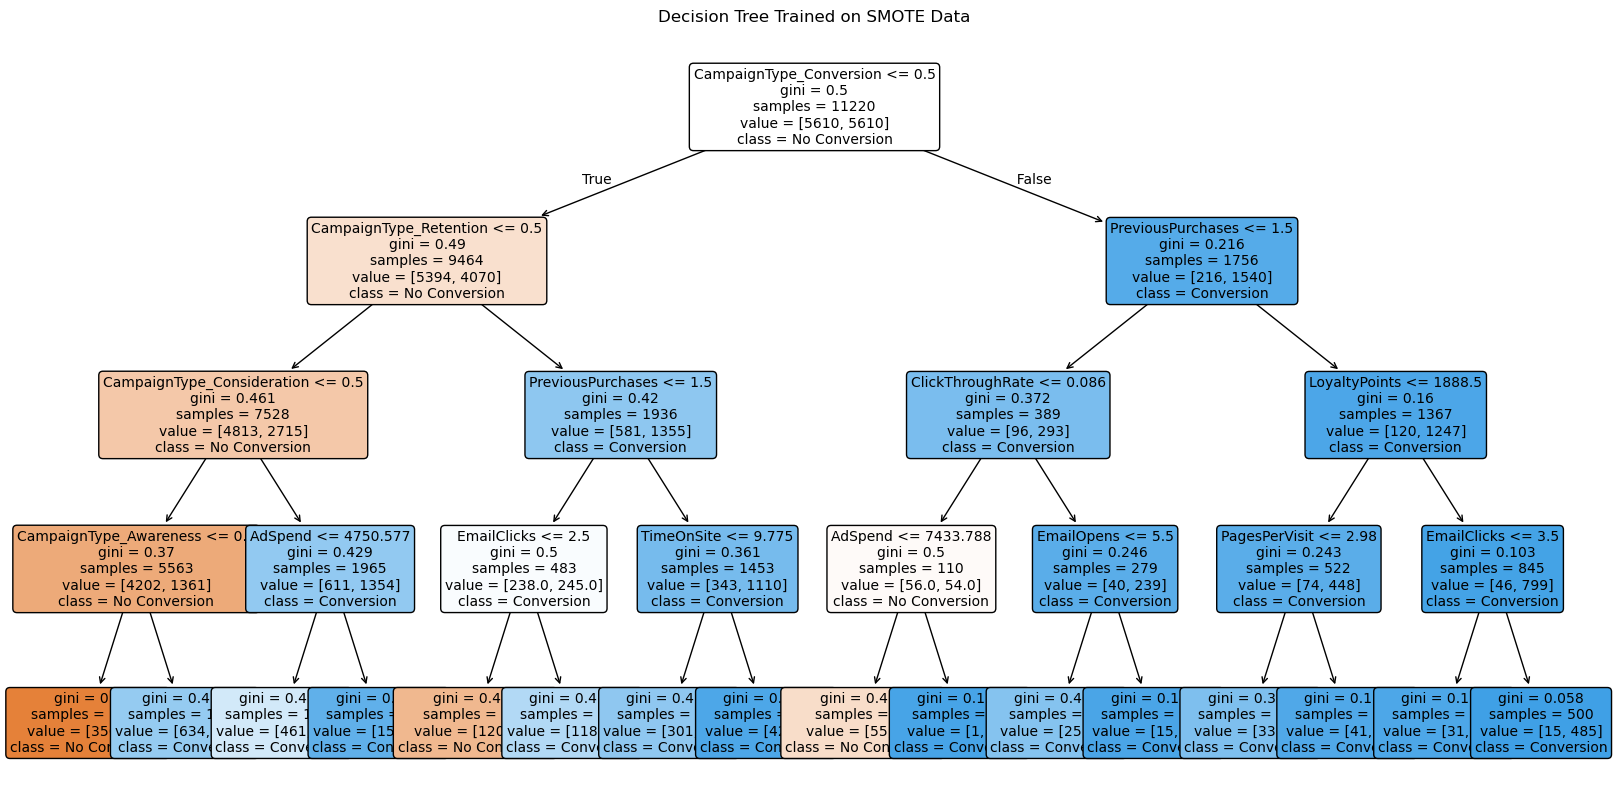

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Train Decision Tree on SMOTE data with max depth 4
dt_model_smote = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model_smote.fit(X_train_smote, y_train_smote)

# Step 2: Predict on original test set
y_pred_dt_smote = dt_model_smote.predict(X_test_orig)

# Step 3: Evaluate performance
print("🔹 Decision Tree (max_depth=4, SMOTE-trained, Original Test Set):")
print(f"Accuracy: {accuracy_score(y_test_orig, y_pred_dt_smote):.3f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_orig, y_pred_dt_smote))
print("Classification Report:")
print(classification_report(y_test_orig, y_pred_dt_smote))

# Step 4: Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_orig, y_pred_dt_smote),
                       display_labels=dt_model_smote.classes_).plot(cmap='Purples')
plt.title('Decision Tree Confusion Matrix (max_depth=4)')
plt.show()
plt.figure(figsize=(20, 10))
plot_tree(dt_model_smote, 
          feature_names=X_train_smote.columns, 
          class_names=['No Conversion', 'Conversion'],
          filled=True, 
          rounded=True, 
          max_depth=4,  # optional: limit depth for readability
          fontsize=10)
plt.title("Decision Tree Trained on SMOTE Data")
plt.show()


🔹 Random Forest (SMOTE-trained, Original Test Set):
Accuracy: 0.885
Confusion Matrix:
[[  29  169]
 [  15 1387]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.15      0.24       198
           1       0.89      0.99      0.94      1402

    accuracy                           0.89      1600
   macro avg       0.78      0.57      0.59      1600
weighted avg       0.86      0.89      0.85      1600



<Figure size 800x600 with 0 Axes>

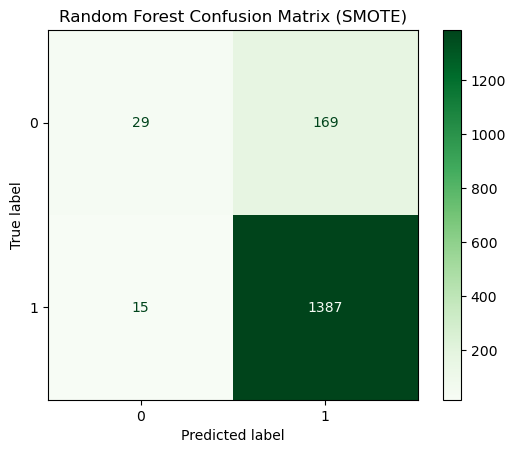

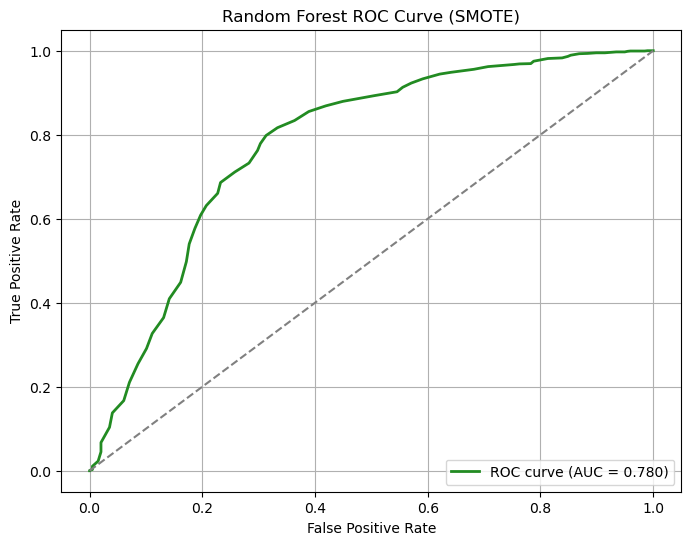

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Train Random Forest on SMOTE-balanced data
rf_model_smote = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)

# Step 2: Predict on original test data
y_pred_rf_smote = rf_model_smote.predict(X_test_orig)

# Step 3: Evaluate performance
print("🔹 Random Forest (SMOTE-trained, Original Test Set):")
print(f"Accuracy: {accuracy_score(y_test_orig, y_pred_rf_smote):.3f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_orig, y_pred_rf_smote))
print("Classification Report:")
print(classification_report(y_test_orig, y_pred_rf_smote))

# Step 4: Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_orig, y_pred_rf_smote),
                       display_labels=rf_model_smote.classes_).plot(cmap='Greens')
plt.title('Random Forest Confusion Matrix (SMOTE)')
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

# Step 5: Predict probabilities for the positive class
y_probs_rf = rf_model_smote.predict_proba(X_test_orig)[:, 1]

# Step 6: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_orig, y_probs_rf)
roc_auc = roc_auc_score(y_test_orig, y_probs_rf)

# Step 7: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='forestgreen', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve (SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


🔹 XGBoost (SMOTE-trained, Original Test Set):
Accuracy: 0.907
Confusion Matrix:
[[  80  118]
 [  30 1372]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.40      0.52       198
           1       0.92      0.98      0.95      1402

    accuracy                           0.91      1600
   macro avg       0.82      0.69      0.73      1600
weighted avg       0.90      0.91      0.90      1600



F:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:20:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Figure size 800x600 with 0 Axes>

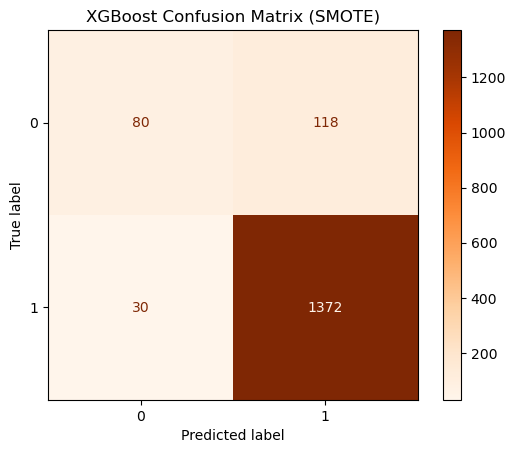

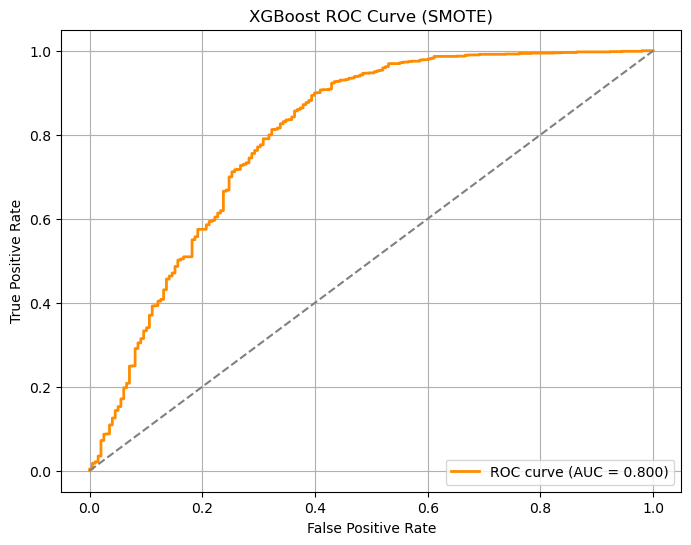

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Train XGBoost on SMOTE-balanced data
xgb_model_smote = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_smote.fit(X_train_smote, y_train_smote)

# Step 2: Predict on original test data
y_pred_xgb_smote = xgb_model_smote.predict(X_test_orig)

# Step 3: Evaluate performance
print("🔹 XGBoost (SMOTE-trained, Original Test Set):")
print(f"Accuracy: {accuracy_score(y_test_orig, y_pred_xgb_smote):.3f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_orig, y_pred_xgb_smote))
print("Classification Report:")
print(classification_report(y_test_orig, y_pred_xgb_smote))

# Step 4: Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_orig, y_pred_xgb_smote),
                       display_labels=xgb_model_smote.classes_).plot(cmap='Oranges')
plt.title('XGBoost Confusion Matrix (SMOTE)')
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score

# Step 5: Predict probabilities for the positive class (class 1)
y_probs_xgb_smote = xgb_model_smote.predict_proba(X_test_orig)[:, 1]

# Step 6: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_orig, y_probs_xgb_smote)
roc_auc = roc_auc_score(y_test_orig, y_probs_xgb_smote)

# Step 7: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve (SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


🔹 MLPClassifier (SMOTE-trained, Original Test Set):
Accuracy: 0.847
Confusion Matrix:
[[  68  130]
 [ 115 1287]]
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.34      0.36       198
           1       0.91      0.92      0.91      1402

    accuracy                           0.85      1600
   macro avg       0.64      0.63      0.64      1600
weighted avg       0.84      0.85      0.84      1600



<Figure size 800x600 with 0 Axes>

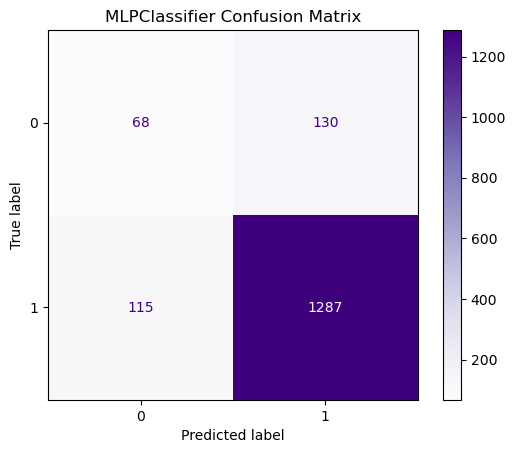

In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test_orig)

# Step 2: Train MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train_smote)

# Step 3: Predict on original test data
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Step 4: Evaluate the model
print("🔹 MLPClassifier (SMOTE-trained, Original Test Set):")
print(f"Accuracy: {accuracy_score(y_test_orig, y_pred_mlp):.3f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_orig, y_pred_mlp))
print("Classification Report:")
print(classification_report(y_test_orig, y_pred_mlp))

# Step 5: Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_orig, y_pred_mlp),
                       display_labels=mlp_model.classes_).plot(cmap='Purples')
plt.title('MLPClassifier Confusion Matrix')
plt.show()


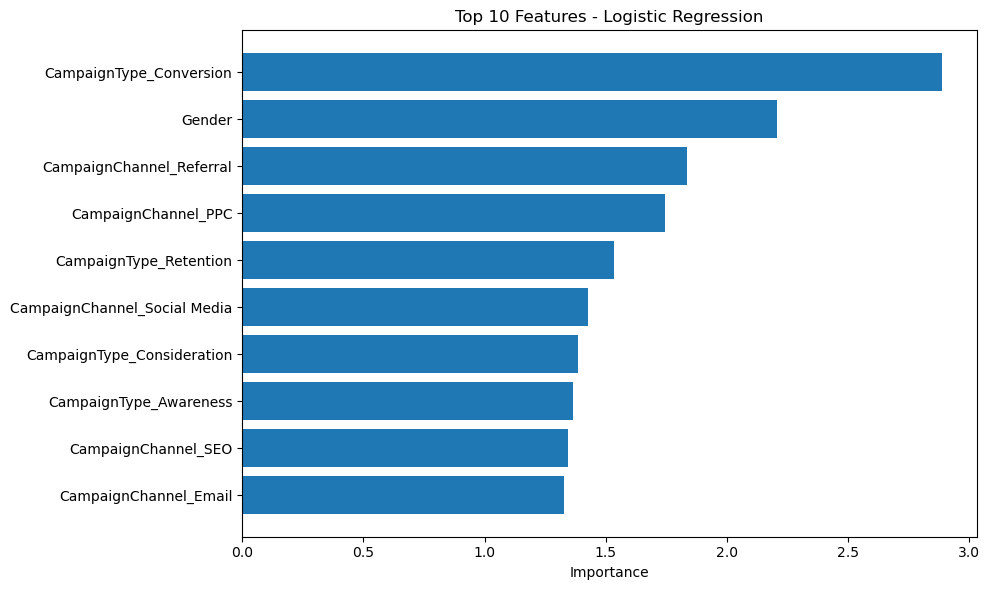

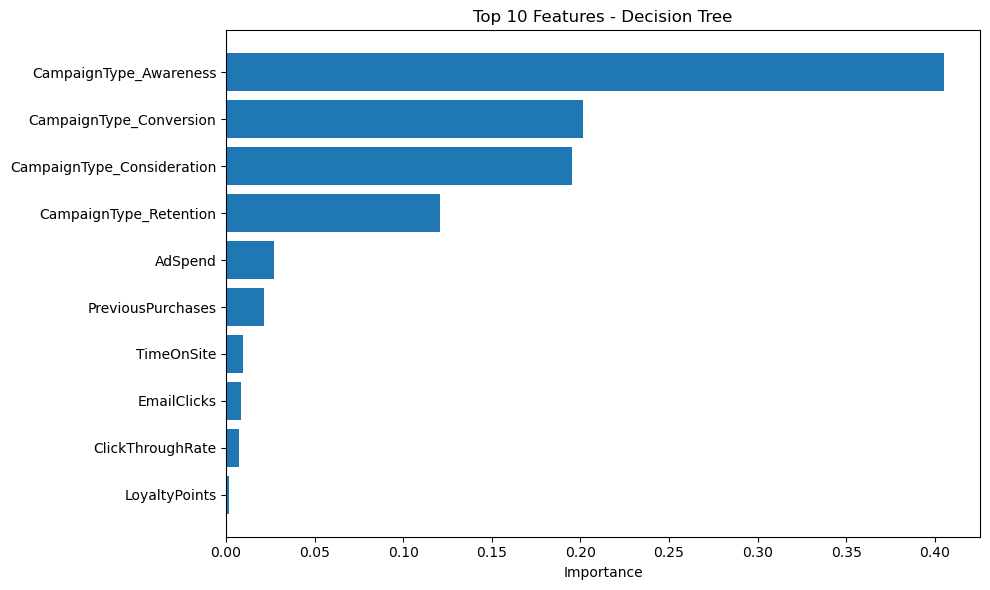

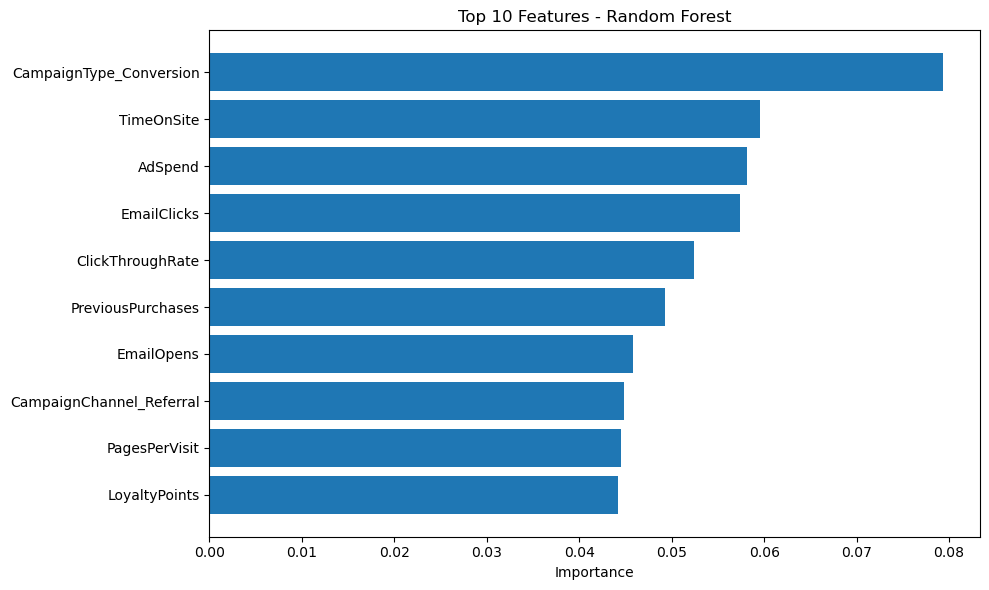

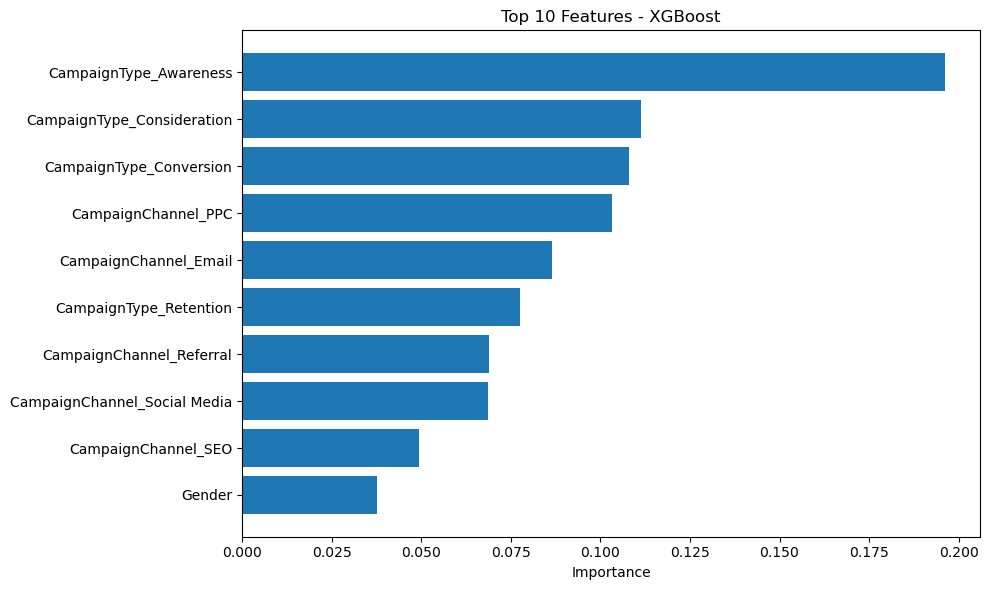


🔹 Logistic Regression - Top 10 Features:
                          Feature  Importance
16       CampaignType_Conversion    2.885511
1                         Gender    2.208204
20      CampaignChannel_Referral    1.836168
19           CampaignChannel_PPC    1.743436
17        CampaignType_Retention    1.533540
22  CampaignChannel_Social Media    1.426877
15    CampaignType_Consideration    1.383936
14        CampaignType_Awareness    1.366560
21           CampaignChannel_SEO    1.342989
18         CampaignChannel_Email    1.329814

🔹 Decision Tree - Top 10 Features:
                        Feature  Importance
14      CampaignType_Awareness    0.405194
16     CampaignType_Conversion    0.201318
15  CampaignType_Consideration    0.195131
17      CampaignType_Retention    0.120589
3                      AdSpend    0.026821
12           PreviousPurchases    0.021461
8                   TimeOnSite    0.009315
11                 EmailClicks    0.008130
4             ClickThroughRate    0.00

In [52]:
 import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Feature names
feature_names = X_train_smote.columns

# Logistic Regression: absolute coefficients
lr_importance = np.abs(model.coef_[0])
lr_df = pd.DataFrame({'Feature': feature_names, 'Importance': lr_importance}).sort_values(by='Importance', ascending=False)

# Decision Tree: feature importances
dt_importance = dt_model_smote.feature_importances_
dt_df = pd.DataFrame({'Feature': feature_names, 'Importance': dt_importance}).sort_values(by='Importance', ascending=False)

# Random Forest: feature importances
rf_importance = rf_model_smote.feature_importances_
rf_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importance}).sort_values(by='Importance', ascending=False)

# XGBoost: feature importances
xgb_importance = xgb_model_smote.feature_importances_
xgb_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_importance}).sort_values(by='Importance', ascending=False)

# Function to plot top N features
def plot_top_features(df, model_name, top_n=10):
    plt.figure(figsize=(10, 6))
    plt.barh(df['Feature'][:top_n][::-1], df['Importance'][:top_n][::-1])
    plt.title(f'Top {top_n} Features - {model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

# Plot bar graphs for each model
plot_top_features(lr_df, 'Logistic Regression')
plot_top_features(dt_df, 'Decision Tree')
plot_top_features(rf_df, 'Random Forest')
plot_top_features(xgb_df, 'XGBoost')

# Display summary tables
print("\n🔹 Logistic Regression - Top 10 Features:\n", lr_df.head(10))
print("\n🔹 Decision Tree - Top 10 Features:\n", dt_df.head(10))
print("\n🔹 Random Forest - Top 10 Features:\n", rf_df.head(10))
print("\n🔹 XGBoost - Top 10 Features:\n", xgb_df.head(10))


In [54]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Collect predictions for each model (assuming already predicted)
acc_lr = accuracy_score(y_test_orig, y_pred)                 # Logistic Regression
acc_dt = accuracy_score(y_test_orig, y_pred_dt_smote)        # Decision Tree
acc_rf = accuracy_score(y_test_orig, y_pred_rf_smote)        # Random Forest
acc_xgb = accuracy_score(y_test_orig, y_pred_xgb_smote)      # XGBoost
acc_mlp = accuracy_score(y_test_orig, y_pred_mlp)            # MLPClassifier

# Create summary table
accuracy_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'MLP Classifier'],
    'Accuracy': [acc_lr, acc_dt, acc_rf, acc_xgb, acc_mlp]
})

# Display sorted by accuracy
accuracy_table.sort_values(by='Accuracy', ascending=False, inplace=True)
print("🔹 Model Accuracy Comparison:\n")
display(accuracy_table)


🔹 Model Accuracy Comparison:



,Model,Accuracy
3,XGBoost,0.907500
2,Random Forest,0.885000
1,Decision Tree,0.870625
4,MLP Classifier,0.846875
0,Logistic Regression,0.796250


In [92]:
import pandas as pd
import numpy as np

# Step 1: Sample a full random row (no fixed seed)
random_row = df.sample(1)
random_features = random_row.drop('Conversion', axis=1)
true_label = random_row['Conversion'].values[0]

# Step 2: Scale features for models that require it (MLP)
scaled_features = scaler.transform(random_features)

# Step 3: Predict using each model
pred_lr  = model.predict(random_features)[0]
pred_dt  = dt_model_smote.predict(random_features)[0]
pred_rf  = rf_model_smote.predict(random_features)[0]
pred_xgb = xgb_model_smote.predict(random_features)[0]
pred_mlp = mlp_model.predict(scaled_features)[0]

# Step 4: Compile all predictions
comparison_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'MLP Classifier'],
    'Prediction': [pred_lr, pred_dt, pred_rf, pred_xgb, pred_mlp],
    'Actual Class': [true_label]*5
})

# Step 5: Display
print(" Prediction Comparison for a Random Sample:\n")
display(comparison_table)

print("\n Input Feature Values Used:")
display(random_features)


🔍 Prediction Comparison for a Random Sample:



,Model,Prediction,Actual Class
0,Logistic Regression,1,0
1,Decision Tree,1,0
2,Random Forest,0,0
3,XGBoost,0,0
4,MLP Classifier,0,0



🧪 Input Feature Values Used:


,Age,Gender,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,...,LoyaltyPoints,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media
2069,30,0,23497,1906.41018,0.010828,0.021765,36,1.80611,0.726803,18,...,3522,1,0,0,0,0,0,0,0,1
